# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the data

In [2]:
df=pd.read_csv('movies.csv')

In [3]:
df=df.drop(df[df['name']=='Longshot'].index)
df=df.drop(df[df['name']=='Five Days One Summer'].index)
df=df.drop(df[df['name']=='Taipei Story'].index)
df=df.drop(df[df['name']=='O.C. and Stiggs'].index)
df=df.drop(df[df['name']=='The House on Carroll Street'].index)
df=df.drop(df[df['name']=='The Garden'].index)
df=df.drop(df[df['name']=='Strangers'].index)
df=df.drop(df[df['name']=='The White Balloon'].index)
df=df.drop(df[df['name']=='Romeo and Juliet'].index)
df=df.drop(df[df['name']=='Dahmer'].index)

# Looking at the data

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.shape

(7659, 15)

In [6]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7659 entries, 0 to 7667
Data columns (total 15 columns):
name        7659 non-null object
rating      7582 non-null object
genre       7659 non-null object
year        7659 non-null int64
released    7657 non-null object
score       7656 non-null float64
votes       7656 non-null float64
director    7659 non-null object
writer      7657 non-null object
star        7658 non-null object
country     7656 non-null object
budget      5492 non-null float64
gross       7471 non-null float64
company     7642 non-null object
runtime     7655 non-null float64
dtypes: float64(5), int64(1), object(9)
memory usage: 957.4+ KB


In [8]:
df.describe(include='object')

,name,rating,genre,released,director,writer,star,country,company
count,7659,7582,7659,7657,7659,7657,7658,7656,7642
unique,7503,12,19,3405,2945,4531,2810,59,2378
top,Fever Pitch,R,Comedy,"October 4, 1991 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,3695,2243,9,38,37,43,5470,377


# Data cleaning

# Checking for missing values

In [9]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         2
star           1
country        3
budget      2167
gross        188
company       17
runtime        4
dtype: int64

In [10]:
for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(percent_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


# Removing the null values

In [11]:
df.dropna(inplace=True)

# Dropping the duplicates

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


# Extracting month and year 

In [14]:
import re

In [15]:
df['correct month']=df['released'].str.extract('(\D+)')

In [16]:
df['correct year']=df['released'].str.extract('(\s+\d+\s+)')

In [17]:
df['correct day']=df['released'].str.extract('(\d+)')

 # Ordering the data

In [18]:
df.sort_values(by=['gross'],inplace=True,ascending=False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct month,correct year,correct day
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,December,2009,18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,April,2019,26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,December,1997,19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,December,2015,18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,April,2018,27
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0,July,2019,19
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0,June,2015,12
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0,May,2012,4
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0,April,2015,3
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0,November,2019,22


# Checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x165aa2a0ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x165aa2b83c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x165aa2a08d0>],
 'medians': [<matplotlib.lines.Line2D at 0x165aa2b8c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x165aa2bf080>],
 'means': []}

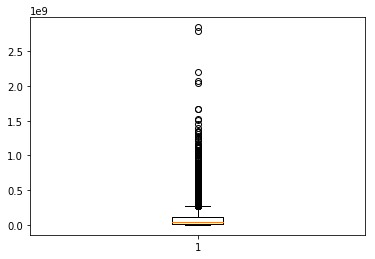

In [19]:
plt.boxplot(df['gross'])

# Removing outliers

In [20]:
from scipy import stats

In [21]:
z_scores=stats.zscore(df['gross'])
abs_z_score=np.abs(z_scores)
df=df[abs_z_score<3]

In [22]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct month,correct year,correct day
6673,The Hunger Games: Mockingjay - Part 2,PG-13,Action,2015,"November 20, 2015 (United States)",6.6,297000.0,Francis Lawrence,Peter Craig,Jennifer Lawrence,United States,160000000.0,658344137.0,Lionsgate,137.0,November,2015,20
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,657926987.0,Warner Bros.,120.0,November,2017,17
6477,Big Hero 6,PG,Animation,2014,"November 7, 2014 (United States)",7.8,423000.0,Don Hall,Jordan Roberts,Ryan Potter,United States,165000000.0,657869686.0,FortyFour Studios,102.0,November,2014,7
7296,Fantastic Beasts: The Crimes of Grindelwald,PG-13,Adventure,2018,"November 16, 2018 (United States)",6.5,234000.0,David Yates,J.K. Rowling,Eddie Redmayne,United Kingdom,200000000.0,654855901.0,Heyday Films,134.0,November,2018,16
4244,Pirates of the Caribbean: the Curse of the Bla...,PG-13,Action,2003,"July 9, 2003 (United States)",8.0,1000000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,140000000.0,654264015.0,Walt Disney Pictures,143.0,July,2003,9
4058,Star Wars: Episode II - Attack of the Clones,PG,Action,2002,"May 16, 2002 (United States)",6.5,658000.0,George Lucas,George Lucas,Hayden Christensen,United States,115000000.0,653779970.0,Lucasfilm,142.0,May,2002,16
6247,Thor: The Dark World,PG-13,Action,2013,"November 8, 2013 (United States)",6.8,618000.0,Alan Taylor,Christopher L. Yost,Chris Hemsworth,United States,170000000.0,644783140.0,Marvel Studios,112.0,November,2013,8
6854,Moana,PG,Animation,2016,"November 23, 2016 (United States)",7.6,289000.0,Directors,Jared Bush,Auli'i Cravalho,United States,150000000.0,644411850.0,Hurwitz Creative,107.0,November,2016,23
6859,Sing,PG,Animation,2016,"December 21, 2016 (United States)",7.1,140000.0,Garth Jennings,Garth Jennings,Matthew McConaughey,United States,75000000.0,634208384.0,Dentsu,108.0,December,2016,21
5247,Kung Fu Panda,PG,Animation,2008,"June 6, 2008 (United States)",7.6,432000.0,Mark Osborne,Jonathan Aibel,Jack Black,United States,130000000.0,631746197.0,DreamWorks Animation,92.0,June,2008,6


# Data Exploration

Text(0.5,1,'Gross earnings vs Budget')

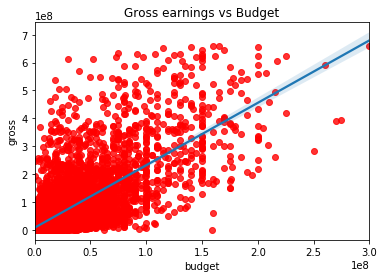

In [23]:
sns.regplot(data=df,x='budget',y='gross',scatter_kws={'color':'red'}).set_title('Gross earnings vs Budget')

From the graph, we see that there is a positive relation between the budget and the gross earnings of the movie

# Correlation Matrix

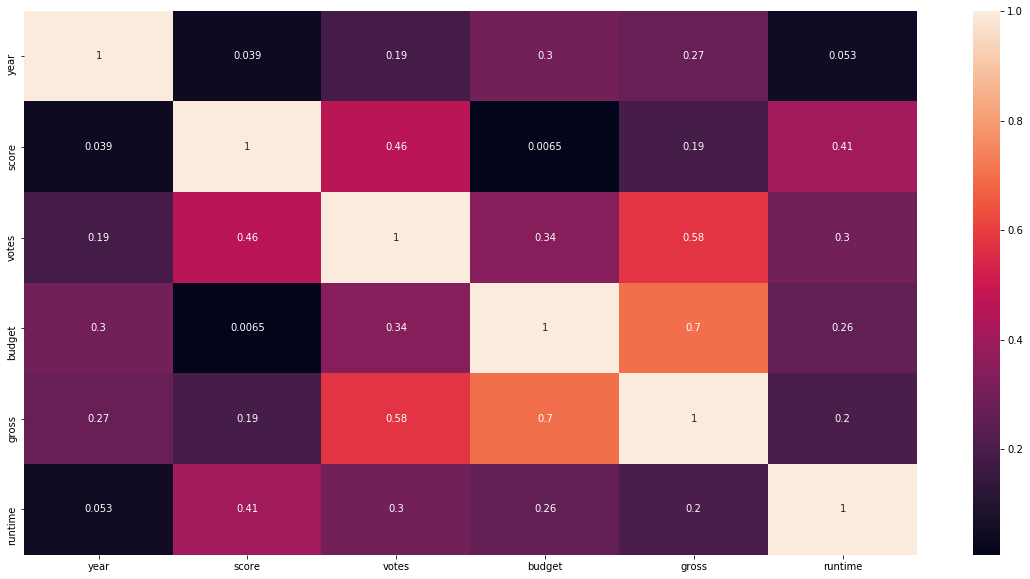

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Updating all columns to numerical values
   We do this to find the correlation between all the variables and not just the numerical variables

In [ ]:
df_cat=df

for col in df_cat.columns:
    if df_cat[col].dtype=='object':
        df_cat[col]=df_cat[col].astype('category').cat.codes

In [ ]:
df_cat.corr()

# Highest correlation

In [ ]:
corr_pairs=df_cat.corr().unstack()
sorted_corr=corr_pairs.sort_values()
high_corr=sorted_corr[sorted_corr>0.5]

In [ ]:
high_corr

# Visualizing the correlation

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cat.corr(),annot=True)

# Conclusion
 On analyzing, we understood that the major factors contributing to the success of a movie are the budget and votes as they have the highest correlation.

# Continuing the Data Exploration
# What is the best time of year to release a movie?

In [41]:
g1=df.groupby('correct month')['gross'].sum()

In [42]:
g1

correct month
April         2.127706e+10
August        3.174289e+10
December      4.879083e+10
February      2.813386e+10
January       2.812097e+10
July          4.695777e+10
June          5.087780e+10
March         3.270461e+10
May           4.164681e+10
November      4.908178e+10
October       2.864571e+10
September     2.285364e+10
Name: gross, dtype: float64

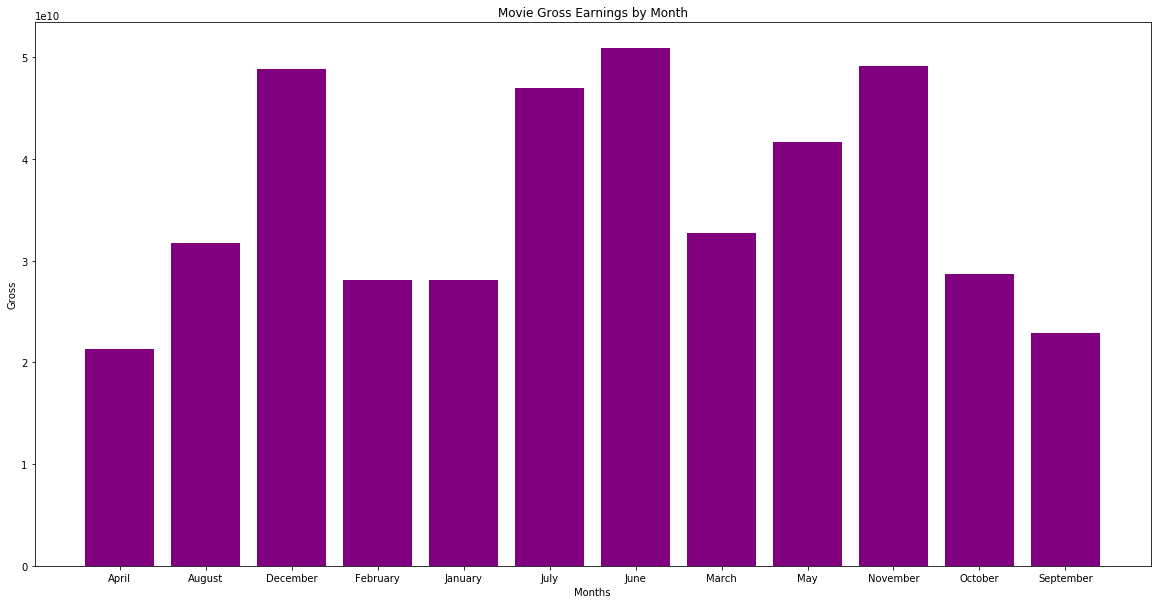

In [46]:
months=['April','August','December','February','January','July','June','March','May','November','October','September']
plt.figure(figsize=(20,10))
plt.bar(months,df.groupby('correct month')['gross'].sum(), color=('purple'))
plt.xticks(months)
plt.title('Movie Gross Earnings by Month')
plt.ylabel('Gross')
plt.xlabel('Months')
plt.show()

The graph clearly shows that JUNE is the best month for releasing a movie as the gross earnings are the highest in June.

# What is the ideal run time for a movie?

In [49]:
avg_run=df.groupby('runtime')['gross'].mean()
avg_run

runtime
63.0     4.987143e+07
69.0     4.225466e+07
71.0     6.582052e+06
72.0     1.507129e+08
73.0     1.168305e+07
74.0     3.000406e+07
75.0     4.195398e+07
76.0     4.197302e+07
77.0     4.583421e+07
78.0     7.501464e+07
79.0     3.255827e+07
80.0     3.883031e+07
81.0     8.570859e+07
82.0     5.810382e+07
83.0     6.457815e+07
84.0     6.154259e+07
85.0     5.121068e+07
86.0     7.011957e+07
87.0     4.929395e+07
88.0     7.318354e+07
89.0     5.771242e+07
90.0     5.646913e+07
91.0     5.637841e+07
92.0     8.338365e+07
93.0     5.362137e+07
94.0     5.279212e+07
95.0     6.098351e+07
96.0     6.069627e+07
97.0     5.753744e+07
98.0     6.281266e+07
             ...     
163.0    4.974099e+08
164.0    1.065960e+08
165.0    1.887279e+08
166.0    3.358028e+08
167.0    7.558368e+07
168.0    1.564802e+08
169.0    2.908459e+08
170.0    1.412920e+08
171.0    8.064706e+06
172.0    7.666768e+07
175.0    1.672982e+08
177.0    1.762623e+07
178.0    1.222395e+08
180.0    1.982486e+08
18

Text(0.5,1,'Runtime vs Average Gross Earnings')

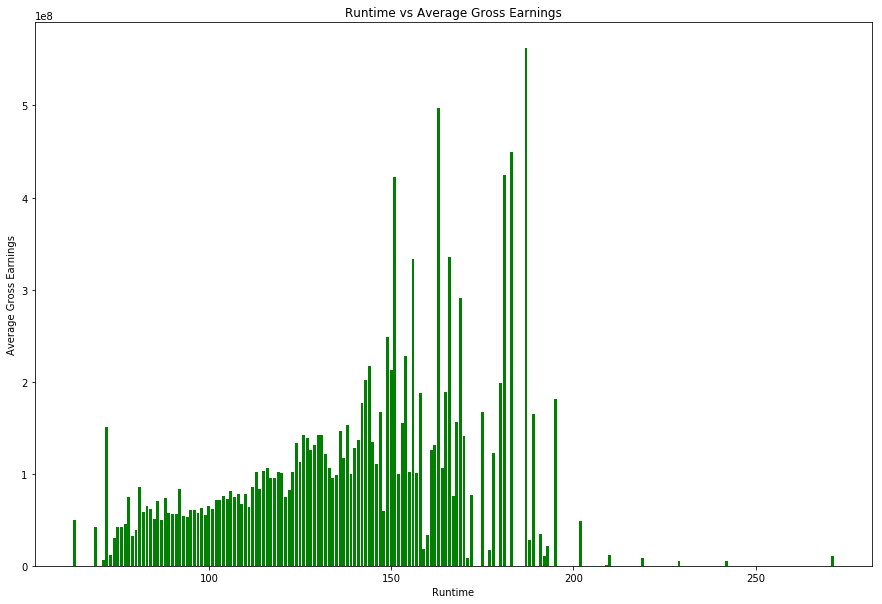

In [59]:
plt.figure(figsize=(15,10))
plt.bar(avg_run.index,avg_run,color='green')
plt.xlabel('Runtime')
plt.ylabel('Average Gross Earnings')
plt.title('Runtime vs Average Gross Earnings')

The ideal runtime would be between 160 to 190 minutes. 

# What genre of movie had the most success overall? What genre of movie had the most success on average?

In [64]:
genre_grp=df.groupby('genre')['gross'].agg(['sum','mean'])
genres=genre_grp.index.tolist()
sum_gross=genre_grp['sum'].tolist()
mean_gross=genre_grp['mean'].tolist()

Text(0.5,0,'Genres')

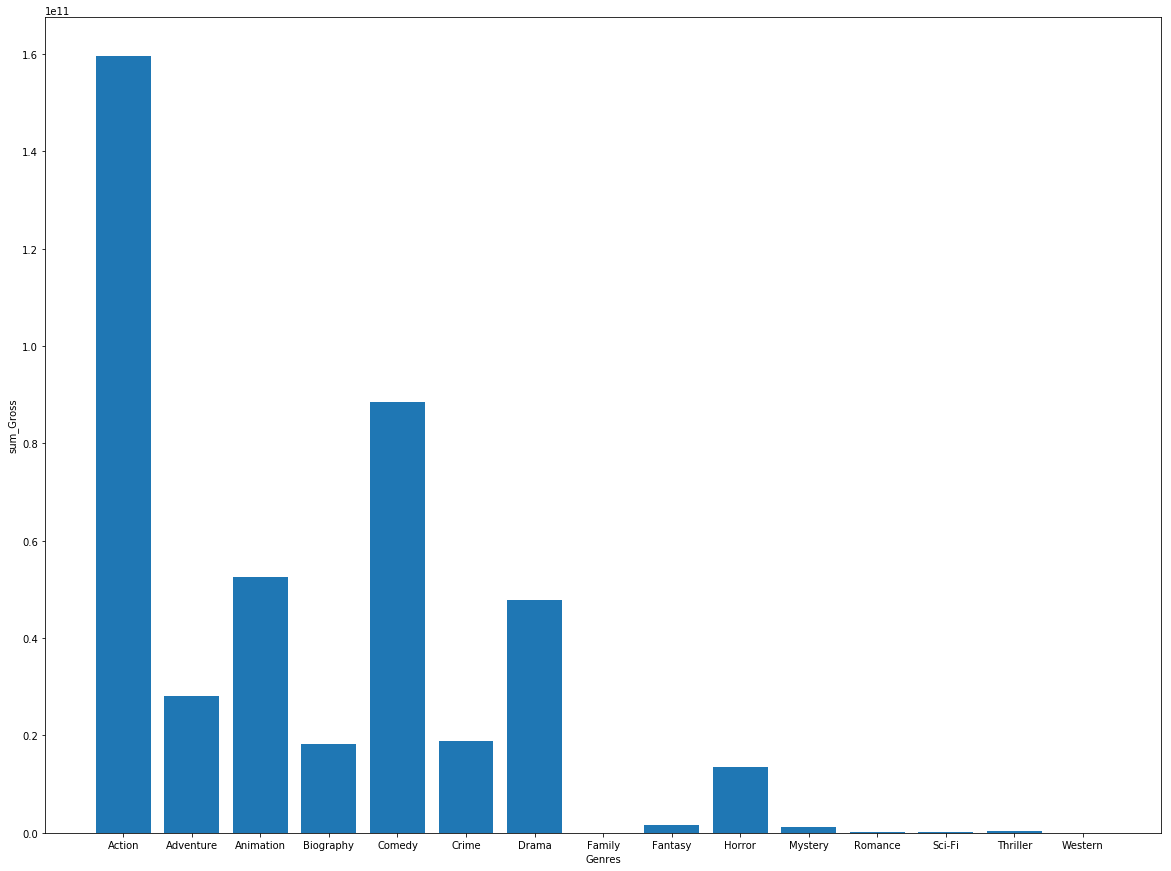

In [75]:
plt.figure(figsize=(20,15))
plt.bar(genres,sum_gross)
plt.ylabel('sum_Gross')
plt.xlabel('Genres')

Text(0.5,0,'Genres')

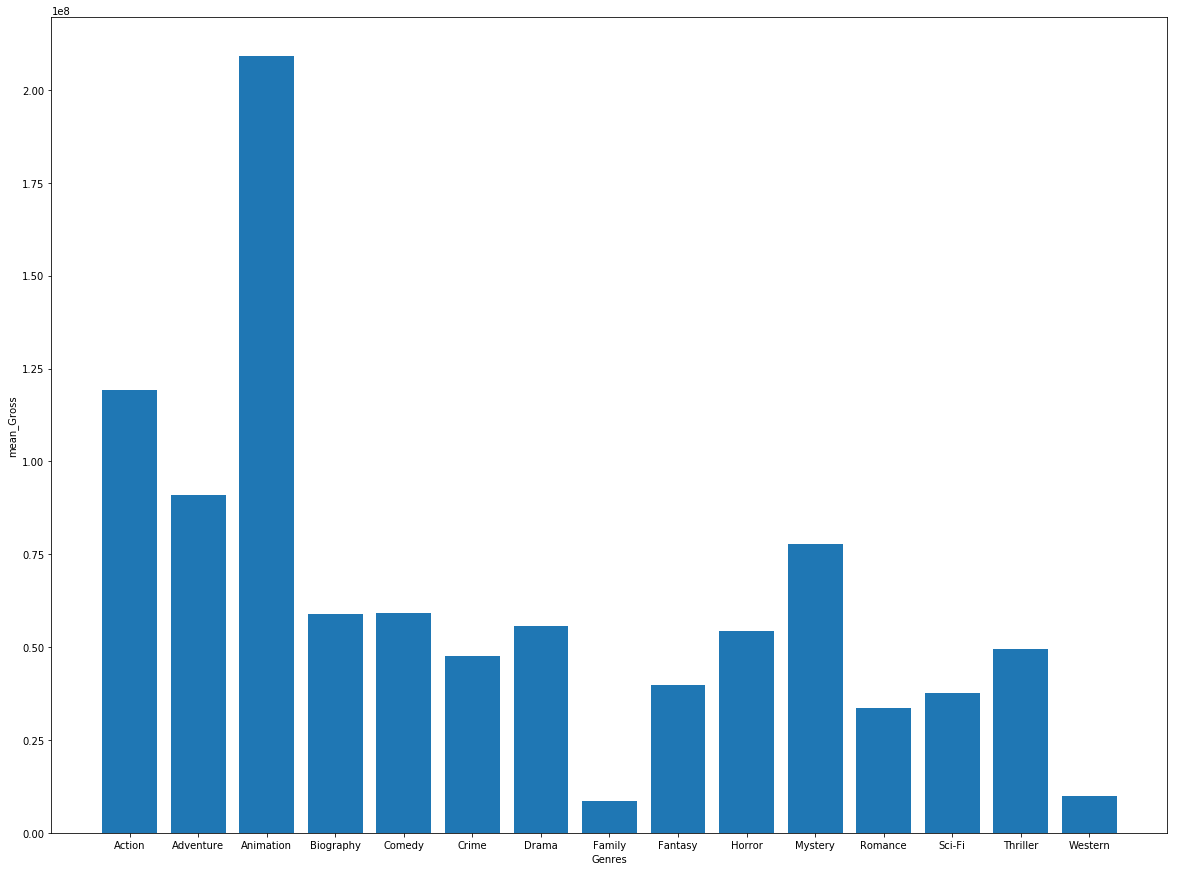

In [76]:
plt.figure(figsize=(20,15))
plt.bar(genres,mean_gross)
plt.ylabel('mean_Gross')
plt.xlabel('Genres')

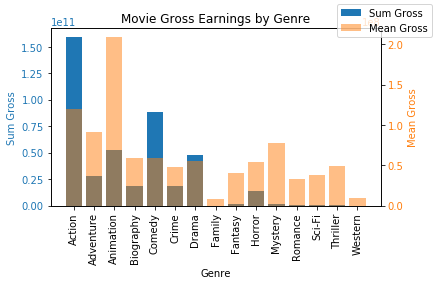

In [79]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.bar(genres, sum_gross, color=color, label='Sum Gross')

# Add labels and title
ax1.set_xlabel('Genre')
ax1.set_ylabel('Sum Gross', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Movie Gross Earnings by Genre')
plt.xticks(rotation=90)


# Create a second y-axis for mean gross and coefficient of variation
ax2 = ax1.twinx()

# Plot the bar chart for mean gross and coefficient of variation
color = 'tab:orange'
ax2.bar(genres, mean_gross, color=color, alpha=0.5, label='Mean Gross')
#ax2.plot(genres, cv_gross, color='tab:red', marker='o', label='Coefficient of Variation')

# Add labels and title
ax2.set_ylabel('Mean Gross', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend
fig.legend()

# Adjust layout
fig.tight_layout()

plt.show()

From the graph, we see that the Action genre had the highest level of success across all movies, while the animation genre had the highest level of success on average.

# Conclusion
From my Analysis, it was understood thart the most significant factors contributing to a movies succes were the production, the budget of the movie and the votes. Also, certain genres like action and animation had a higher success rate than the rest of the movie genres. 